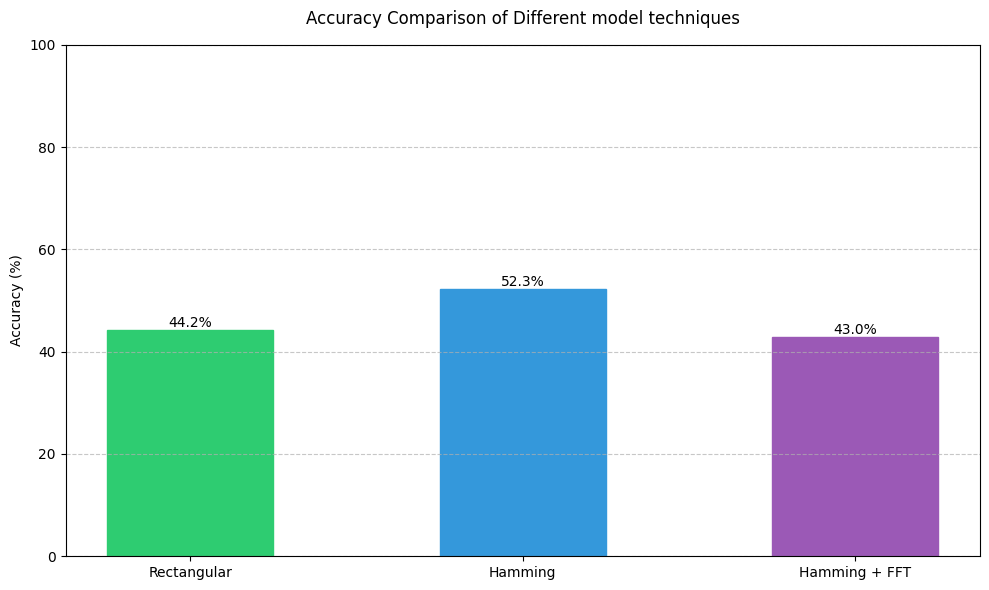

In [2]:
import matplotlib.pyplot as plt
import numpy as np

# Example accuracy values - replace these with your actual results
accuracies = {
    'Rectangular': 44.21,
    'Hamming': 52.32,
    'Hamming + FFT': 42.97
}

# Create bar graph
plt.figure(figsize=(10, 6))
bars = plt.bar(accuracies.keys(), accuracies.values(), width=0.5)

# Customize the graph
plt.title('Accuracy Comparison of Different model techniques', fontsize=12, pad=15)
plt.ylabel('Accuracy (%)', fontsize=10)
plt.ylim(0, 100)  # Set y-axis from 0 to 100%

# Add value labels on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.1f}%',
             ha='center', va='bottom')

# Add grid for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Customize colors
colors = ['#2ecc71', '#3498db', '#9b59b6']
for bar, color in zip(bars, colors):
    bar.set_color(color)

plt.tight_layout()
plt.show()

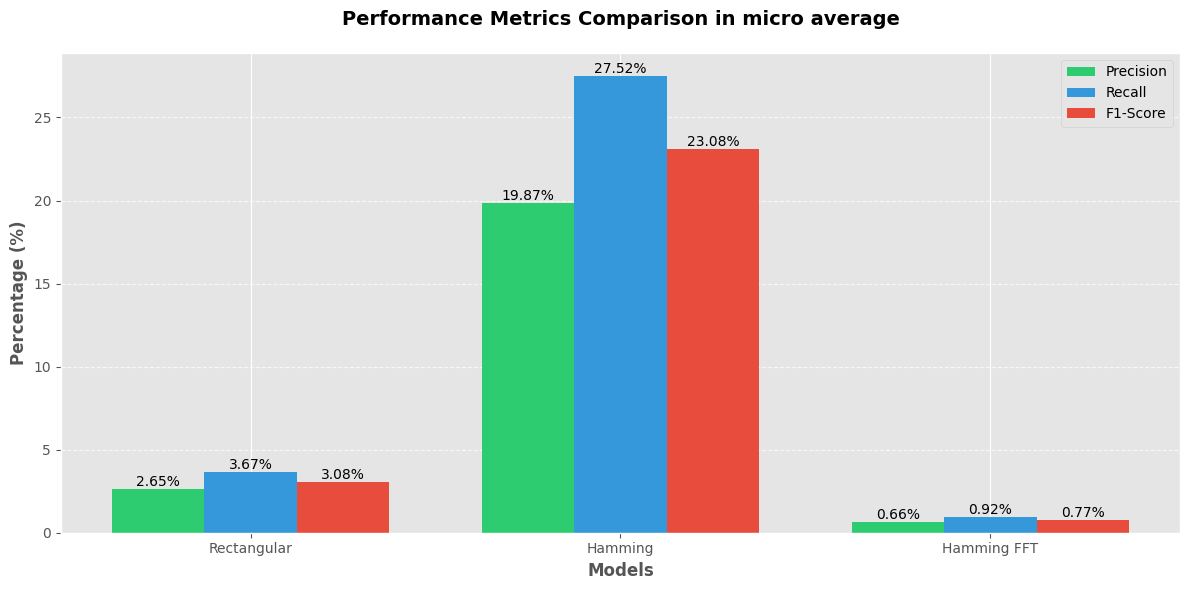

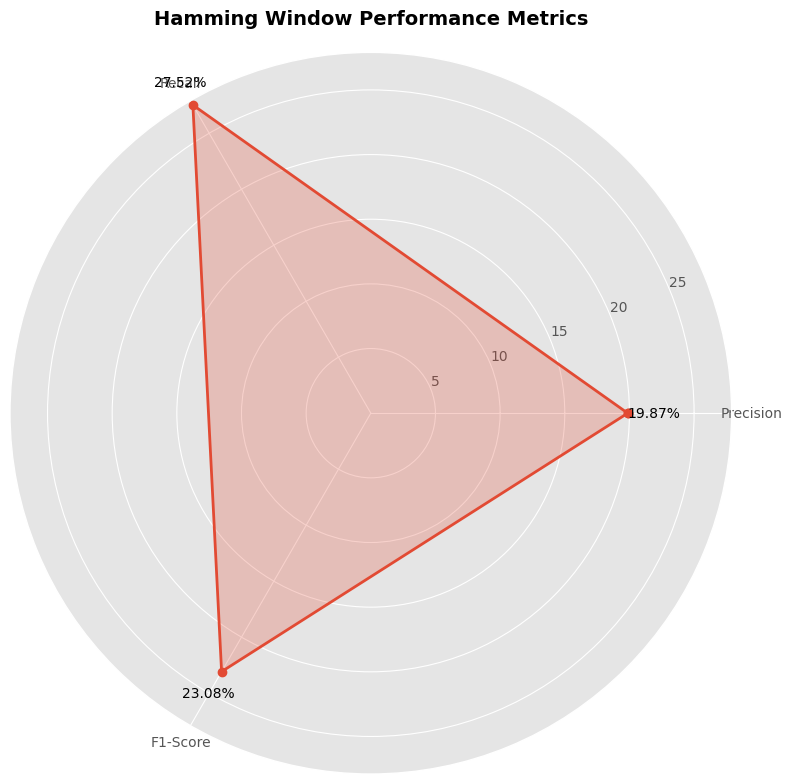

<Figure size 1000x600 with 0 Axes>

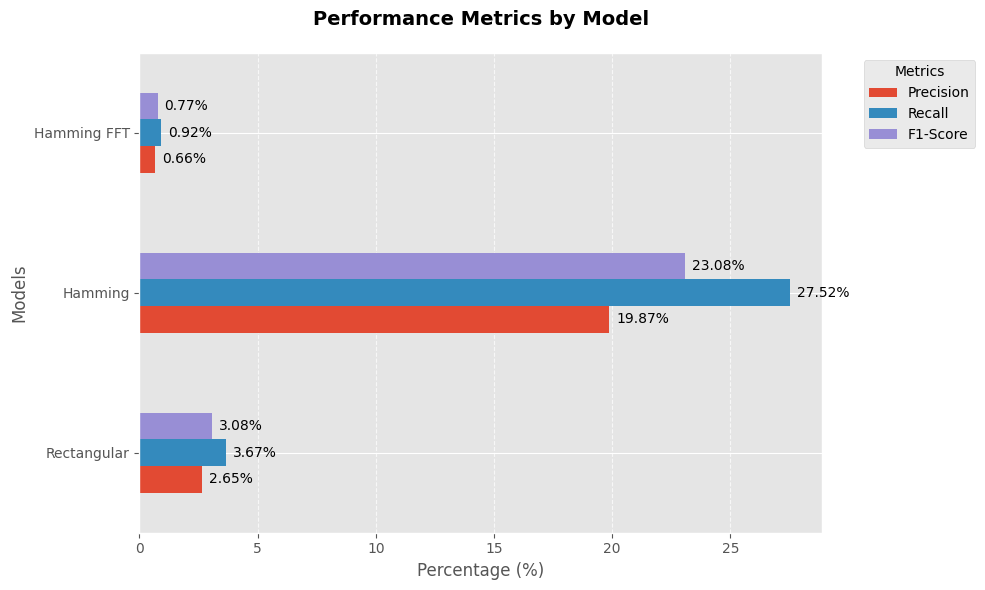

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Data
models = ['Rectangular', 'Hamming', 'Hamming FFT']
metrics = {
    'Precision': [2.65, 19.87, 0.66],
    'Recall': [3.67, 27.52, 0.92],
    'F1-Score': [3.08, 23.08, 0.77]
}

# Set style
plt.style.use('ggplot')  # Using 'ggplot' style instead of 'seaborn'
plt.figure(figsize=(12, 6))

# Bar positions
x = np.arange(len(models))
width = 0.25

# Create bars
plt.bar(x - width, metrics['Precision'], width, label='Precision', color='#2ecc71')
plt.bar(x, metrics['Recall'], width, label='Recall', color='#3498db')
plt.bar(x + width, metrics['F1-Score'], width, label='F1-Score', color='#e74c3c')

# Customize the plot
plt.xlabel('Models', fontsize=12, fontweight='bold')
plt.ylabel('Percentage (%)', fontsize=12, fontweight='bold')
plt.title('Performance Metrics Comparison in micro average', fontsize=14, fontweight='bold', pad=20)
plt.xticks(x, models, fontsize=10)
plt.legend(fontsize=10)

# Add value labels on the bars
def add_value_labels(ax):
    for rect in ax.patches:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., height,
                f'{height:.2f}%',
                ha='center', va='bottom')

add_value_labels(plt.gca())

# Adjust layout and display
plt.tight_layout()
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.show()

# Create a radar chart for the best model (Hamming)
categories = ['Precision', 'Recall', 'F1-Score']
values = [19.87, 27.52, 23.08]

angles = np.linspace(0, 2*np.pi, len(categories), endpoint=False)
values = np.concatenate((values, [values[0]]))  # complete the loop
angles = np.concatenate((angles, [angles[0]]))  # complete the loop
categories = np.concatenate((categories, [categories[0]]))

fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(projection='polar'))
ax.plot(angles, values, 'o-', linewidth=2, label='Hamming Window')
ax.fill(angles, values, alpha=0.25)
ax.set_thetagrids(angles[:-1] * 180/np.pi, categories[:-1])
ax.set_title('Hamming Window Performance Metrics', fontsize=14, fontweight='bold', pad=20)
ax.grid(True)

# Add value labels
for angle, value in zip(angles[:-1], values[:-1]):
    ax.text(angle, value + 2, f'{value:.2f}%', 
            ha='center', va='center')

plt.tight_layout()
plt.show()

# Create a horizontal bar chart for easy comparison
plt.figure(figsize=(10, 6))
models_metrics = pd.DataFrame(metrics)
models_metrics.index = models

ax = models_metrics.plot(kind='barh', figsize=(10, 6))
plt.title('Performance Metrics by Model', fontsize=14, fontweight='bold', pad=20)
plt.xlabel('Percentage (%)', fontsize=12)
plt.ylabel('Models', fontsize=12)

# Add value labels
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f%%', padding=5)

plt.legend(title='Metrics', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.grid(True, axis='x', linestyle='--', alpha=0.7)
plt.show()